# Teknik Binning


Data binning atau bucketing merupakan teknik pra-pemrosesan yang bertujuan untuk meminimalkan pengaruh kesalahan pengamatan. Proses ini dilakukan dengan membagi nilai-nilai data asli ke dalam sejumlah interval kecil yang disebut bin, kemudian setiap nilai dalam bin tersebut diganti dengan nilai representatif tertentu. Teknik ini memberikan efek penghalusan (smoothing) terhadap data serta membantu mengurangi kemungkinan overfitting, terutama ketika bekerja dengan dataset berukuran kecil.

## Library yang digunakan

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Ambil data iris asli

Pada bagian ini, saya menggunakan data iris dari library sklearn dan menampilkan seluruh fitur yang dimilikinya.

In [2]:
# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.to_string(index=False))

 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
               5.1               3.5                1.4               0.2
               4.9               3.0                1.4               0.2
               4.7               3.2                1.3               0.2
               4.6               3.1                1.5               0.2
               5.0               3.6                1.4               0.2
               5.4               3.9                1.7               0.4
               4.6               3.4                1.4               0.3
               5.0               3.4                1.5               0.2
               4.4               2.9                1.4               0.2
               4.9               3.1                1.5               0.1
               5.4               3.7                1.5               0.2
               4.8               3.4                1.6               0.2
               4.8               3.0  

### Klasifikasi Naive Bayes pada Data Iris asli

Pada tahap ini, saya menerapkan algoritma klasifikasi Naive Bayes pada data iris asli guna mengetahui tingkat akurasinya.

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



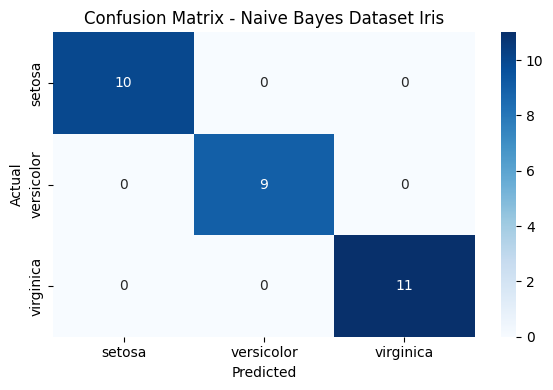

In [3]:

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Dataset Iris')
plt.tight_layout()
plt.show()


### Klasifikasi Decision Tree pada Data Iris asli

Disini saya melakukan klasifikasi Decision Tree pada data iris asli, untuk mencari akurasi data iris

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



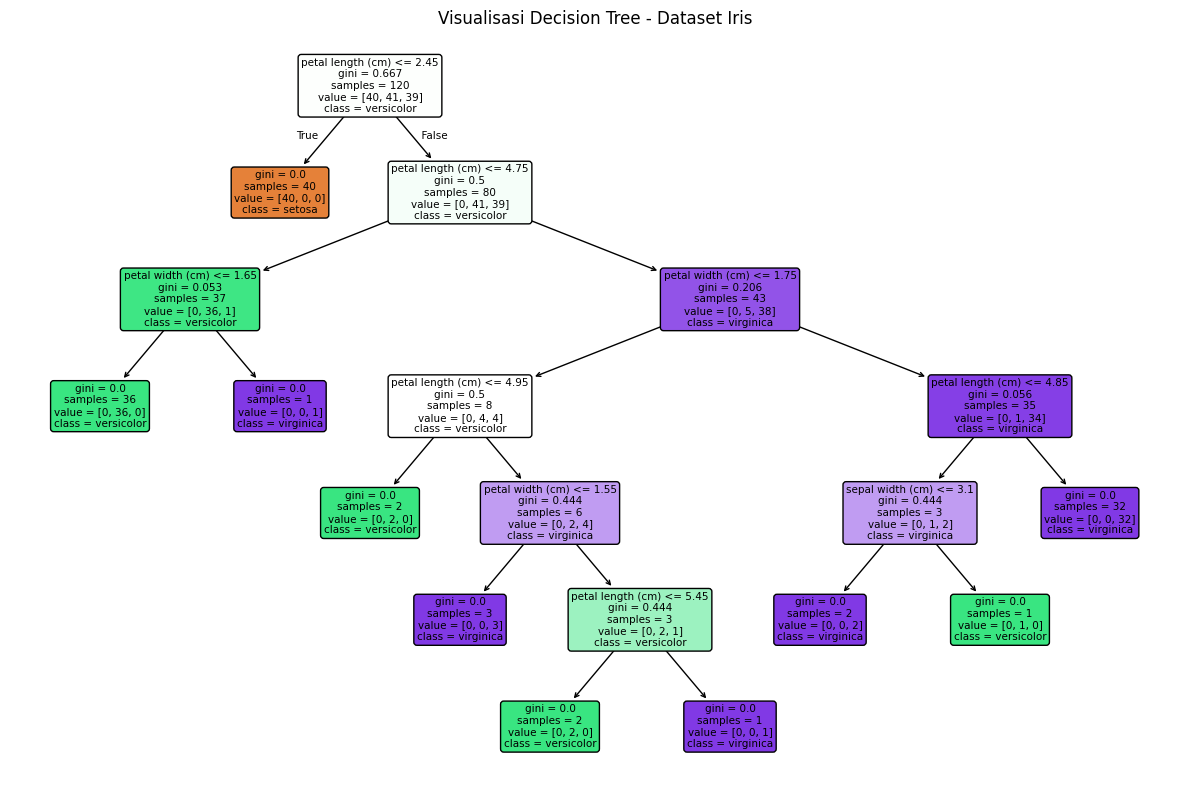

In [4]:

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# -------------------------
# Visualisasi Pohon Keputusan
# -------------------------
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree - Dataset Iris")
plt.tight_layout()
plt.show()

## Diskritisasi Dataset Iris

### Diskritisasi Dataset Iris menggunakan K-Means

#### Penjelasan Konsep Diskritisasi menggunakan K-means
Dalam bidang pengolahan data, salah satu metode diskritisasi yang dianggap modern dan fleksibel adalah K-Means Discretization. Teknik ini berasal dari pendekatan unsupervised learning, di mana algoritma secara otomatis mengenali pola dari data numerik tanpa label. Tujuan utamanya adalah membagi data ke dalam beberapa kelompok (cluster) yang anggotanya memiliki nilai yang serupa berdasarkan kedekatan jarak numerik. Proses ini dimulai dengan menentukan jumlah cluster yang diinginkan—misalnya tiga—lalu algoritma K-Means secara acak memilih titik pusat (centroid) awal. Setiap data akan dihitung jaraknya ke masing-masing centroid dan dimasukkan ke dalam cluster dengan jarak terpendek. Setelah itu, posisi centroid akan diperbarui berdasarkan rata-rata nilai dalam cluster. Langkah-langkah ini diulang sampai hasil pengelompokan menjadi stabil.

Metode ini terbukti efektif dalam menemukan pola-pola tersembunyi yang mungkin tidak bisa dikenali oleh teknik diskritisasi konvensional. Tidak seperti metode berbasis rentang tetap yang kaku, K-Means dapat menyesuaikan pembagian berdasarkan sebaran aktual data. Jika data numerik tersebar secara tidak merata atau membentuk pola tertentu, K-Means mampu memberikan hasil diskritisasi yang lebih relevan. Meski demikian, metode ini memerlukan proses iteratif yang cukup rumit dan peka terhadap pemilihan awal centroid. Selain itu, jumlah cluster harus ditentukan di awal, yang kadang membutuhkan percobaan berulang untuk mendapatkan hasil optimal. Meski begitu, K-Means Discretization tetap menjadi metode unggulan ketika akurasi dalam pengelompokan data menjadi hal yang penting.

In [5]:
# Mapping angka cluster ke huruf
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi clustering per kolom
def cluster_column(column):
    values = df[[column]]
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(values)
    return pd.Series(clusters).map(label_map)

# Buat DataFrame hanya berisi hasil clustering
df_kmeans = pd.DataFrame({
    'sepal_length': cluster_column('sepal length (cm)'),
    'sepal_width':  cluster_column('sepal width (cm)'),
    'petal_length': cluster_column('petal length (cm)'),
    'petal_width':  cluster_column('petal width (cm)')
})

# Tambahkan kolom class_label di bagian depan
df_kmeans.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil klaster
print(df_kmeans.to_string(index=False))

     class sepal_length sepal_width petal_length petal_width
    setosa            C           D            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           D            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           C            B           B
    setosa            B           D            B           B
    setosa            B 

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan K-Means

Pada tahap ini, saya menerapkan klasifikasi Naive Bayes pada data iris yang telah didiskritisasi menggunakan metode K-Means untuk mengevaluasi tingkat akurasinya

In [6]:

# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan K-Means

Pada bagian ini, saya melakukan klasifikasi menggunakan Decision Tree terhadap data iris yang telah didiskritisasi dengan metode K-Means, guna mengukur tingkat akurasinya.

Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



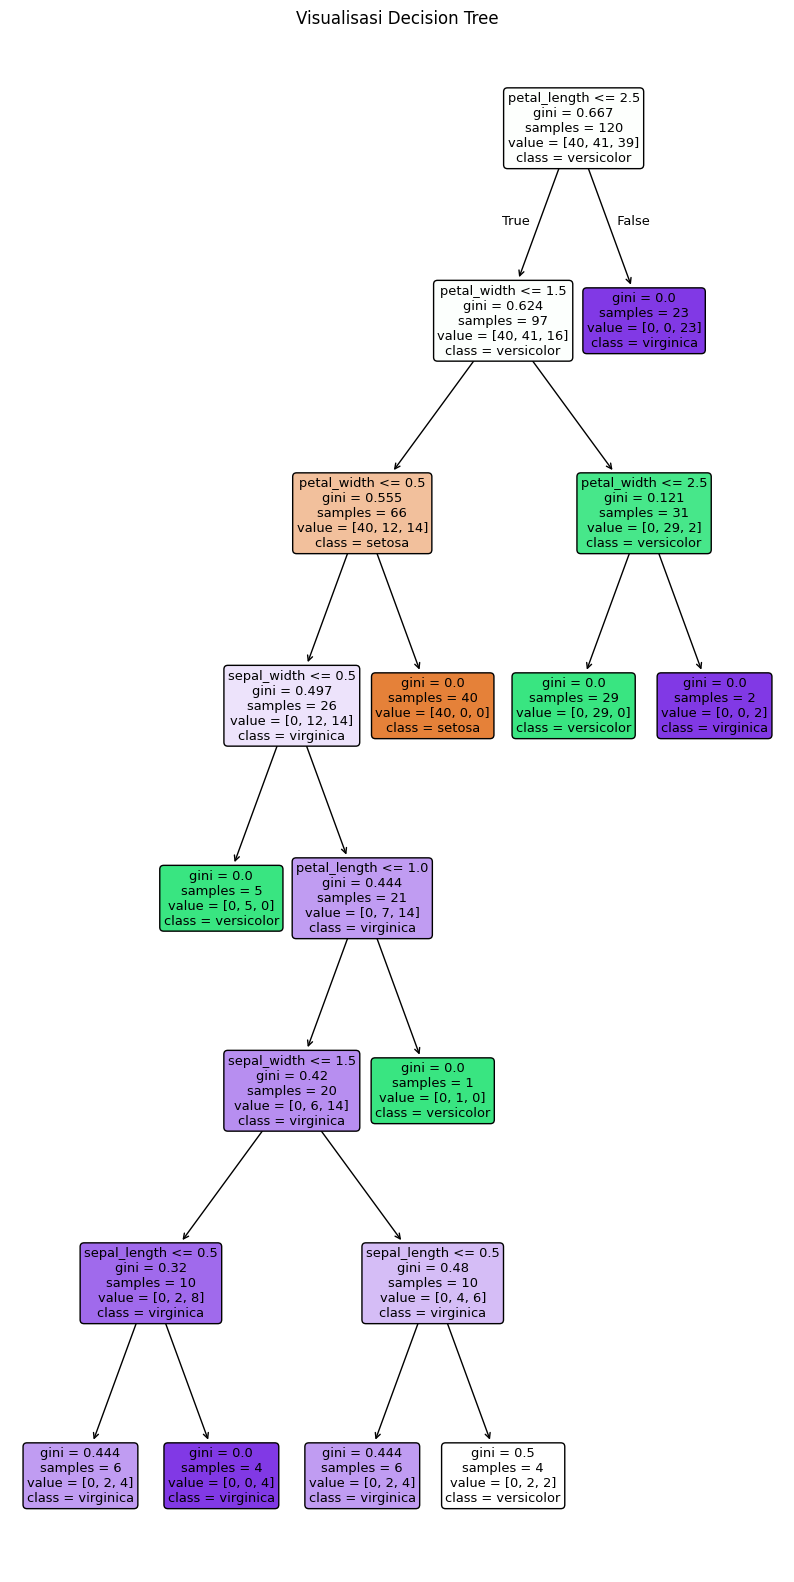

In [7]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


In [ ]:
# Simpan ke file CSV
df_kmeans.to_csv('diskritisasi_iris_kmeans.csv', index=False)

### Diskritisasi Dataset Iris menggunakan Equal-Width Binning

#### Penjelasan Konsep Diskritisasi menggunakan Equal Width Binning

Tidak seperti K-Means yang mendasarkan pengelompokannya pada pola distribusi data, Equal-Width Binning mengadopsi pendekatan yang lebih sederhana dan sistematis. Metode ini membagi rentang data numerik menjadi sejumlah interval dengan lebar yang sama. Proses dimulai dengan menentukan nilai minimum dan maksimum dari data, kemudian menghitung selisihnya dan membaginya dengan jumlah bin yang diinginkan untuk memperoleh lebar tiap bin. Sebagai contoh, jika nilai minimum adalah 12 dan maksimum 40, lalu ingin dibagi menjadi 3 bin, maka lebar setiap bin adalah (40 - 12) / 3 = 9,33. Maka, bin pertama mencakup nilai dari 12 hingga 21,33, bin kedua dari 21,33 hingga 30,66, dan bin ketiga dari 30,66 hingga 40.

Setelah rentang bin ditentukan, setiap data akan dimasukkan ke dalam bin yang sesuai. Untuk mempermudah analisis atau klasifikasi, setiap bin bisa dilabeli, misalnya “Rendah”, “Sedang”, dan “Tinggi”. Equal-Width Binning sangat praktis dan cocok digunakan dalam tahap awal eksplorasi data, khususnya jika data terdistribusi secara merata. Namun, kelemahan dari metode ini adalah ketidakmampuannya menangkap distribusi data secara menyeluruh. Bila data terkonsentrasi di salah satu bagian, maka bisa terjadi ketidakseimbangan antar bin—ada yang terlalu padat dan ada yang kosong. Oleh sebab itu, metode ini lebih tepat dipakai untuk data yang memiliki distribusi mendekati seragam atau ketika kesederhanaan pengelompokan menjadi prioritas.



In [8]:
# Fungsi diskritisasi equal-width
def equiwidth_discretize(arr, m):
    min_val = arr.min()
    max_val = arr.max()
    width = (max_val - min_val) / m

    # Buat batas-batas bin
    bin_edges = [min_val + i * width for i in range(m + 1)]

    # Diskritisasi: untuk setiap nilai, cari bin index
    bin_indices = np.digitize(arr, bins=bin_edges[1:-1], right=True)
    return pd.Series(bin_indices).map(label_map)

# Buat DataFrame hasil diskritisasi
df_equal_width = pd.DataFrame({
    'sepal_length': equiwidth_discretize(df['sepal length (cm)'], 4),
    'sepal_width':  equiwidth_discretize(df['sepal width (cm)'], 4),
    'petal_length': equiwidth_discretize(df['petal length (cm)'], 4),
    'petal_width':  equiwidth_discretize(df['petal width (cm)'], 4)
})

# Tambahkan label kelas di depan
df_equal_width.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_width.to_string(index=False))


     class sepal_length sepal_width petal_length petal_width
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           D            A           A
    setosa            B 

In [9]:
# Simpan ke file CSV
df_equal_width.to_csv('diskritisasi_iris_equalwidth.csv', index=False)

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Width

Pada bagian ini, saya menerapkan algoritma Naive Bayes pada data iris yang telah didiskritisasi menggunakan metode Equal-Width Binning untuk mengukur tingkat akurasinya.

In [10]:
# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9333333333333333

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Width Binning

Pada tahap ini, saya menggunakan algoritma Decision Tree untuk mengklasifikasikan data iris yang telah didiskritisasi dengan metode Equal-Width Binning, dengan tujuan mengetahui tingkat akurasinya.

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



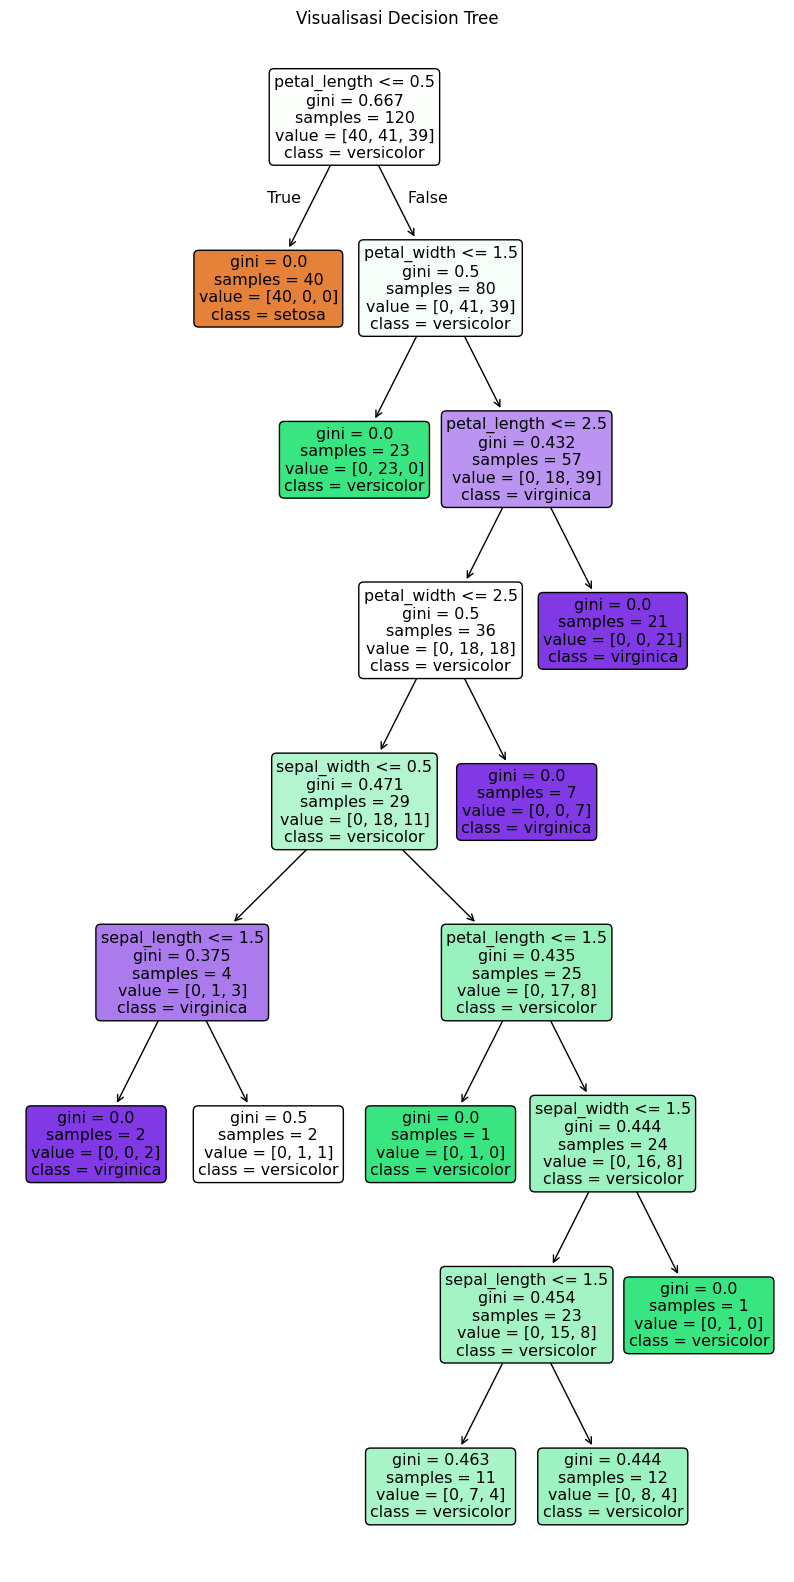

In [11]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


### Diskritisasi Dataset Iris menggunakan Equal-Frequency Binning

#### Penjelasan Konsep Diskritisasi menggunakan Equal-Frequency Binning

Pendekatan diskritisasi ketiga yang sering digunakan adalah Equal-Frequency Binning, yang juga dikenal sebagai quantile-based discretization. Berbeda dengan Equal-Width yang membagi data berdasarkan rentang nilai, metode ini membagi data berdasarkan jumlah data dalam tiap kelompok. Prosesnya dimulai dengan mengurutkan data dari nilai terkecil hingga terbesar, kemudian data dibagi menjadi beberapa bin yang masing-masing berisi jumlah data yang kurang lebih sama. Contohnya, jika data dibagi menjadi empat bin, setiap bin akan memuat sekitar 25% dari total data, dengan batas antar-bin ditentukan oleh kuantil seperti Q1 (25%), Q2 (median), dan Q3 (75%).

Kelebihan Equal-Frequency Binning adalah kemampuannya untuk menjaga keseimbangan jumlah data di setiap bin, yang penting dalam pelatihan model machine learning agar tidak terjadi bias. Jika sebuah bin hanya memiliki sedikit data, model bisa mengabaikannya. Namun, metode ini juga memiliki kekurangan, yaitu lebar interval setiap bin bisa sangat bervariasi. Ada bin yang memiliki rentang nilai sempit, sementara bin lain bisa sangat luas. Ketidakteraturan ini dapat menyulitkan dalam interpretasi hasil atau visualisasi data. Meski begitu, Equal-Frequency tetap menjadi pilihan yang baik saat kestabilan jumlah data per kategori lebih diutamakan dibandingkan keseragaman lebar interval.

In [12]:
# Fungsi manual untuk equal-frequency discretization
def discretize_cdf(data, m):
    data = list(data)
    data_sorted = sorted(data)
    n = len(data_sorted)
    thresholds = [-float('inf')]

    # Hitung batas kuantil
    for k in range(1, m):
        q = k / m
        index = (n - 1) * q
        floor = int(index)
        ceil = floor + 1
        frac = index - floor
        if ceil >= n:
            val = data_sorted[floor]
        else:
            val = data_sorted[floor] + (data_sorted[ceil] - data_sorted[floor]) * frac
        thresholds.append(val)

    thresholds.append(float('inf'))

    # Tentukan label bin untuk setiap nilai
    labels = []
    for value in data:
        for b in range(1, len(thresholds)):
            if thresholds[b - 1] <= value < thresholds[b]:
                labels.append(label_map[b - 1])
                break

    return labels

# Terapkan discretization ke setiap kolom
df_equal_frequency = pd.DataFrame({
    'sepal_length': discretize_cdf(df['sepal length (cm)'], 4),
    'sepal_width':  discretize_cdf(df['sepal width (cm)'], 4),
    'petal_length': discretize_cdf(df['petal length (cm)'], 4),
    'petal_width':  discretize_cdf(df['petal width (cm)'], 4)
})

# Tambahkan kolom kelas di depan
df_equal_frequency.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_frequency.to_string(index=False))


     class sepal_length sepal_width petal_length petal_width
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           D            A           A
    setosa            B           D            B           B
    setosa            A           D            A           B
    setosa            A           D            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           D            B           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            C           D            A           A
    setosa            B 

In [13]:
# Simpan ke file CSV
df_equal_frequency.to_csv('diskritisasi_iris_equalfrequency.csv', index=False)

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Pada tahap ini, saya menerapkan klasifikasi Naive Bayes pada data iris yang telah didiskritisasi menggunakan metode Equal-Frequency Binning untuk mengukur akurasinya.

In [14]:

# -----------------------------
# Proses Klasifikasi Naive Bayes (CategoricalNB)
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Pada bagian ini, saya menggunakan metode klasifikasi Decision Tree pada data iris yang telah didiskritisasi dengan Equal-Frequency Binning untuk menentukan tingkat akurasinya.

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



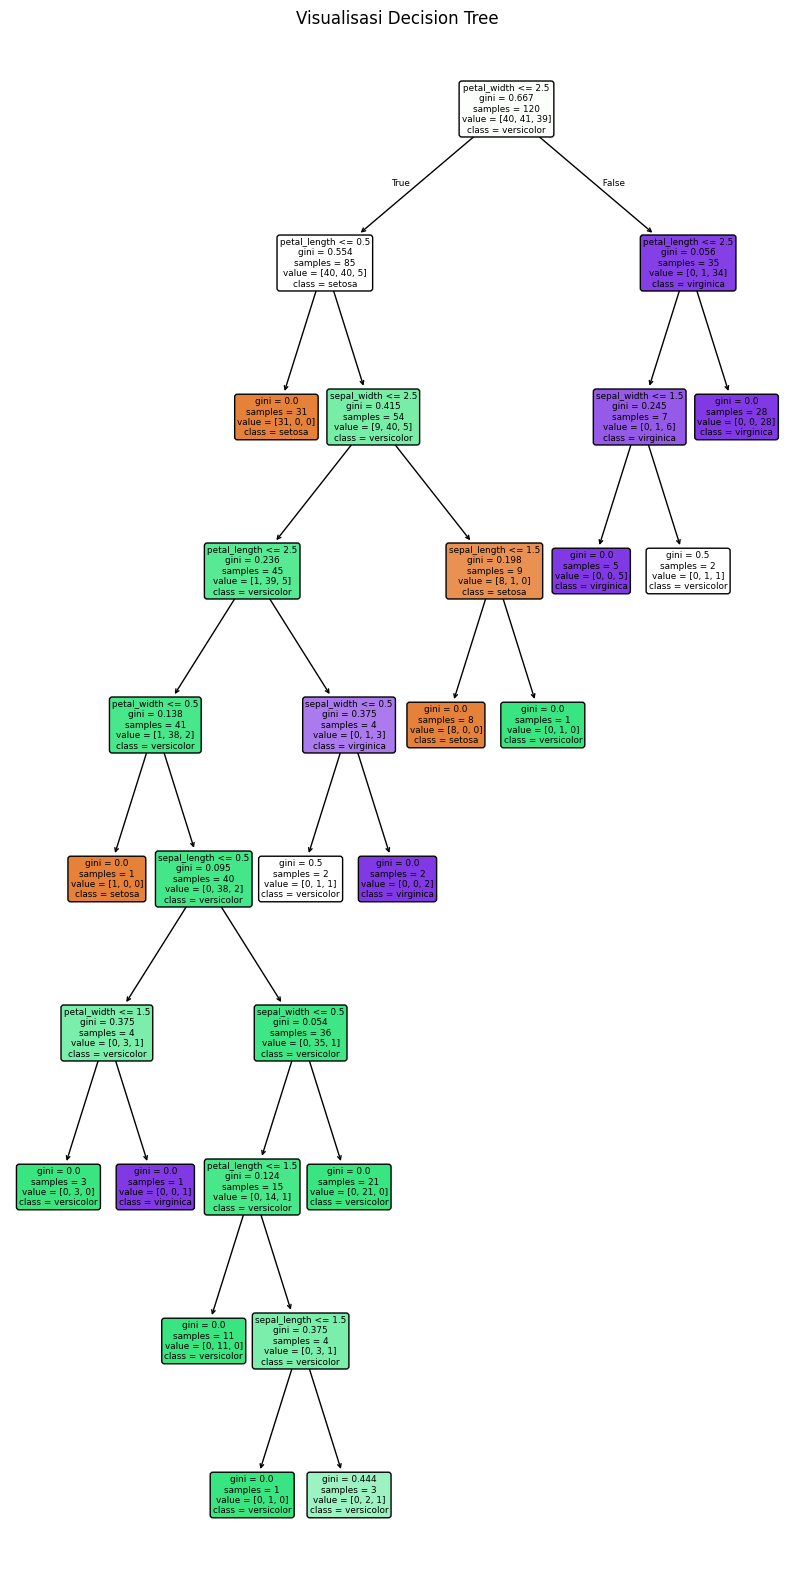

In [16]:

# -----------------------------
# Proses Klasifikasi Decision Tree
# -----------------------------

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualisasi Decision Tree
# -----------------------------
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


### Perbandingan Akurasi

Data iris asli
- Naive Bayes = 100 %
- Decision Tree = 100 %

Data iris hasil diskritisasi menggunakan Kmeans
- Naive Bayes = 90 %
- Decision Tree = 90 %

Data iris hasil diskritisasi menggunakan Equal-Width Binning
- Naive Bayes = 93,33 %
- Decision Tree = 96,67 %

Data iris hasil diskritisasi menggunakan Equal-Frequency Binning
- Naive Bayes = 100 %
- Decision Tree = 96,67 %